In [3]:
import os
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import glob

In [4]:
name_list = glob.glob('dogs-vs-cats/test1/cat*')
print(len(name_list))

X = []
name_label = []

for name in name_list:
  name_label.append(0)

  img = cv2.imread(name)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (64,64))

  X.append((img))

len(X)

12500


12500

In [5]:
name_list = glob.glob('dogs-vs-cats/test1/dog*')
print(len(name_list))

for name in name_list:
  name_label.append(1)

  img = cv2.imread(name)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (64,64))

  X.append((img))
  
len(X)

12500


25000

In [6]:
X = np.array(X)
y = np.array(name_label)

print(X.shape)
print(y.shape)

(25000, 64, 64)
(25000,)


In [7]:
# Split the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(20000, 64, 64) (5000, 64, 64)
(20000,) (5000,)


In [8]:
X_train_scaled = np.array([x.ravel()/255. for x in X_train])
X_test_scaled = np.array([x.ravel()/255. for x in X_test])

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(20000, 4096)
(5000, 4096)


In [9]:
y_train_scaled = np.array([y for y in y_train])
y_test_scaled = np.array([y for y in y_test])

In [10]:
# sigmoid function
g = lambda z : np.exp(z) / (1+np.exp(z))

def predict_prob(X,w):
  z = np.dot(X,w)
  a = g(z)
  return a
def predict(X,w):
  y_hat = predict_prob(X,w)
  y_hat[y_hat >=0.5] =1
  y_hat[y_hat <0.5] =0
  return y_hat
# loss function
def loss(X,y,w):
  y_hat = predict_prob(X,w)
  l = y*np.log(y_hat) + (1-y)*np.log(1-y_hat)
  return -np.mean(l)

In [11]:
# gradient
def grad(X,y,w):
  y_hat = predict_prob(X,w)
  delta = y_hat - y
  dw = np.dot(X.T,delta)
  return dw

In [12]:
def gradient_descent(X,y,lr = 1e-7, epochs = 2000):
  w = np.zeros((X.shape[1],1))
  losses = []
  for i in range(epochs):
    dw = grad(X,y,w)
    w -= lr*dw
    a = loss(X,y,w)
    losses.append(a)
  return losses,w

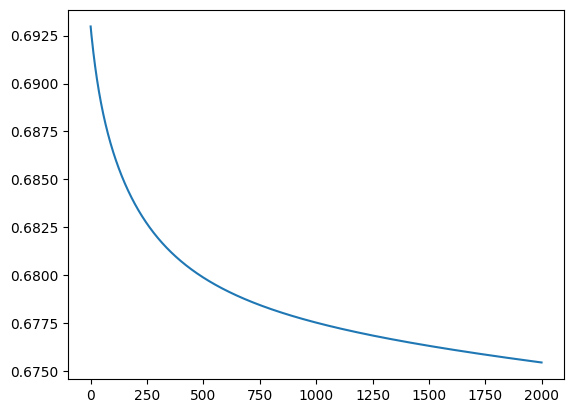

In [14]:
loss,w = gradient_descent(X_train_scaled,np.array([y_train_scaled]).T)
plt.plot(loss)

In [16]:
y_hat = predict(X_test_scaled,w)

## **Đánh giá mô hình: accuracy, recall, f1_score**

In [17]:
def evaluation(y_true, y_pred):
    tp = tn = fp = fn = 0 
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1: 
            tp += 1 
        elif y_true[i] == 0 and y_pred[i] == 0: 
            tn += 1 
        elif y_true[i] == 0 and y_pred[i] == 1: 
            fp += 1 
        elif y_true[i] == 1 and y_pred[i] == 0:
            fn += 1
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = (tp)/(tp+fp)
    recall = (tp)/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    print(f"Accuracy = {accuracy}")
    print(f"Precision = {precision}")
    print(f"Recall = {recall}")
    print(f"F1 Score = {f1_score}")

In [18]:
evaluation(y_test, y_hat)

Accuracy = 0.5694
Precision = 0.5639445300462249
Recall = 0.5891348088531188
F1 Score = 0.5762645148592797


## **Khởi tạo hàm batch_generator để chia nhỏ dữ liệu khi train trên từng epochs.**

In [19]:
import numpy as np

def batch_generator(X, y, batch_size):
    
    m = X.shape[0]  # số lượng mẫu dữ liệu
    batches = []  # khởi tạo list chứa các batch
    
    # chia dữ liệu thành các batch
    for i in range(0, m, batch_size):
        X_batch = X[i:i+batch_size, :]
        y_batch = y[i:i+batch_size]
        batch = (X_batch, y_batch)
        batches.append(batch)
    
    return batches


In [35]:
y_hat = predict(X_test_scaled,w)

In [36]:
evaluation(y_test, y_hat)

Accuracy = 0.5696
Precision = 0.5641124374278013
Recall = 0.5895372233400402
F1 Score = 0.5765446674537583
